# 데이터 분석 기본 - 시각화

- matplotlib, seaborn : 정적인 시각화
- plot : 동적 시각화(인터렉션 가능)

In [74]:
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지

In [67]:
import matplotlib.pyplot as plt

In [68]:
# 데이터 준비
import numpy as np

In [20]:
# ( 0, 0 ) (1, 1) (2, 2) (3, 3) ...  (9,9 )

# x :  0, 1, 2, 3, 4, ... 9
# y :  0, 1, 2, 3, 4, ... 9

In [17]:
x = np.arange(0, 9+1)

In [18]:
y = np.arange(0, 9+1)

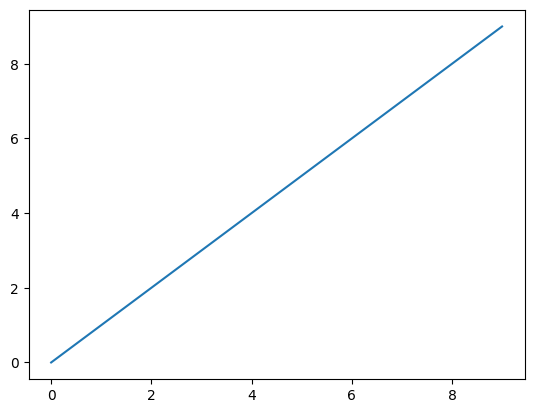

In [19]:
plt.plot(x,y)
plt.show()

## Bar Charts

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [22]:
df = pd.read_csv('datas/pokemon.csv')
df

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [23]:
df.describe()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [25]:
df.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

In [26]:
df['generation_id'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [27]:
# 각 세대별로 몇개의 캐릭터가 있나?
df['generation_id'].value_counts()

generation_id
5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: count, dtype: int64

In [28]:
# 각 세대별로 몇개의 캐릭터가 있는지 시각화 
# 각 데이터의 갯수를 차트로 보여줄수 있는 함수 : sb의 countplot
# sb의 countplot

In [34]:
# 폴더 없으면 자동 생성
folder_path = 'chart_images'
import os
os.makedirs(folder_path, exist_ok=True)

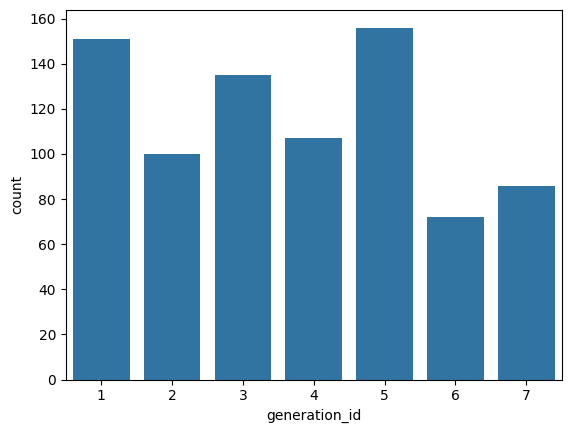

In [35]:
sb.countplot(df, x= 'generation_id')

# 폴더에 차트 저장
plt.savefig('chart_images/chart1.jpg')
plt.show()

In [50]:
base_color = sb.color_palette()[9]

In [51]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [52]:
sb.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

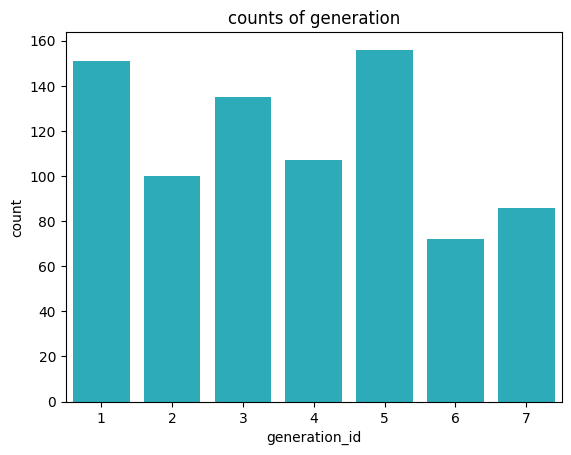

In [53]:
plt.title('counts of generation')
sb.countplot(data= df, x = 'generation_id' , color= base_color )
plt.show()

In [54]:
base_order = df['generation_id'].value_counts().index

In [55]:
base_order

Index([5, 1, 3, 4, 2, 7, 6], dtype='int64', name='generation_id')

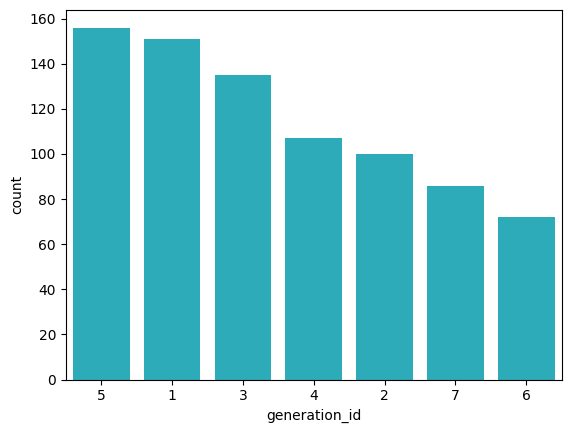

In [56]:
sb.countplot(data= df, x = 'generation_id' , color= base_color , order= base_order )
plt.show()

In [60]:
df

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [57]:
df['type_1'].value_counts()

type_1
water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [58]:
base_order = df['type_1'].value_counts().index

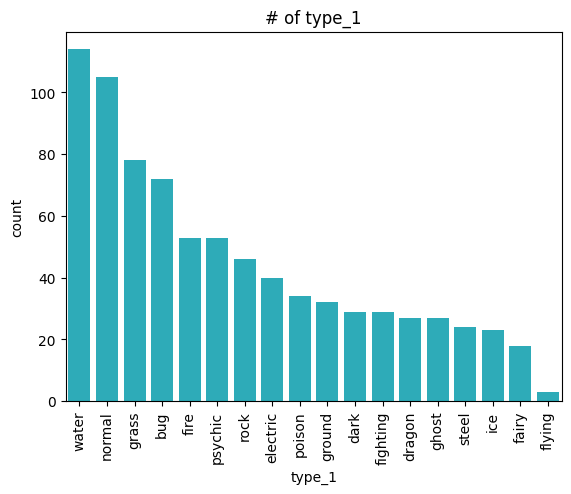

In [59]:
sb.countplot(data= df, x='type_1', order= base_order, color= base_color)
plt.title('# of type_1')
plt.xticks(rotation = 90)
plt.show()

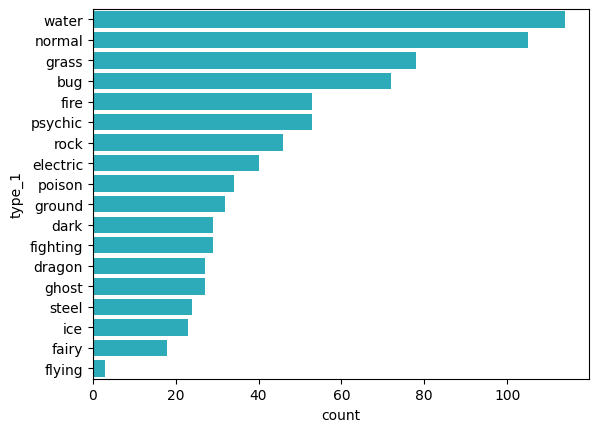

In [61]:
sb.countplot(data = df, y='type_1', order = base_order, color=base_color)
plt.show()

## Pie Charts

In [62]:
data = df['generation_id'].value_counts()

In [63]:
data

generation_id
5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: count, dtype: int64

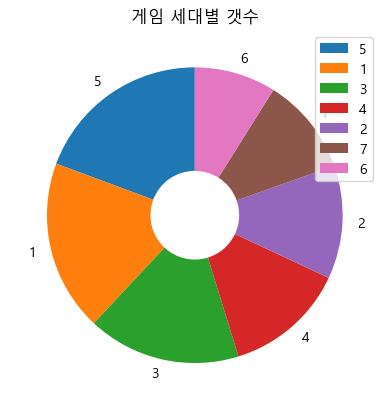

In [73]:
# 한글 표현하기
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지


plt.pie(
    data, 
    labels = data.index, startangle= 90, # 시작 위치 각도
    wedgeprops={'width':0.7} # 도넛의 크기
    )
plt.title('게임 세대별 갯수')
plt.legend(loc = 'upper right')
plt.show()

# 히스토그램 시각화

In [76]:
df

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


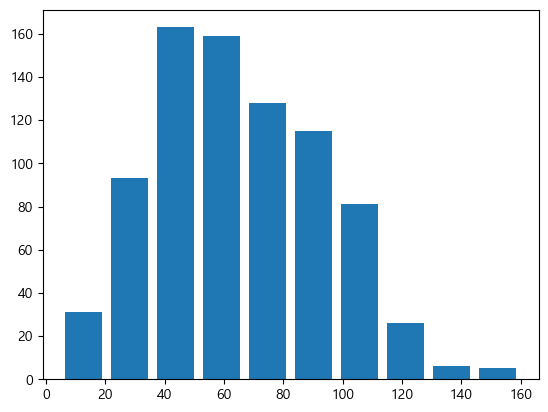

In [77]:
#  matplottlib는 data = 생략볼가
# 가장 기본적인 히스토그램은, 디폴트로 구간(bins)의 갯수를 10개로 잡아줍니다. 
plt.hist(data= df, x = 'speed', rwidth= 0.8)
plt.show()

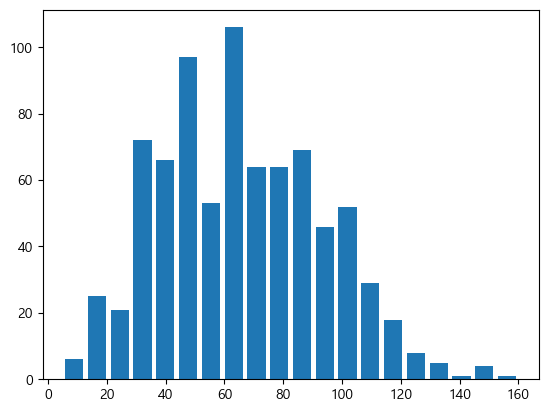

In [79]:
# 1. 구간 (bins) 의 갯수를 조절하는 방법
plt.hist(data = df, x = 'speed', rwidth = 0.8, bins = 20)
plt.show()

In [80]:
# 2. 구간을 수치로 설정하는 방법 
# 최속값과 최대값을 구한후에,  구간 범위를 설정한다.

In [81]:
df['speed'].min()

np.int64(5)

In [82]:
df['speed'].max()

np.int64(160)

In [83]:
my_bins = np.arange(5, 160+7, 7)

In [84]:
my_bins

array([  5,  12,  19,  26,  33,  40,  47,  54,  61,  68,  75,  82,  89,
        96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166])

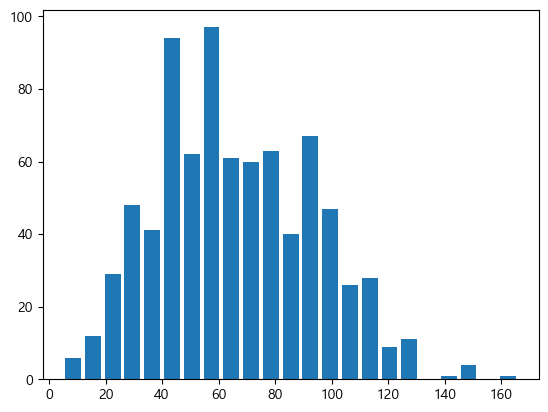

In [89]:
plt.hist(data = df, x ='speed', rwidth = 0.8, bins = my_bins)
plt.show()

# 데이터 로딩

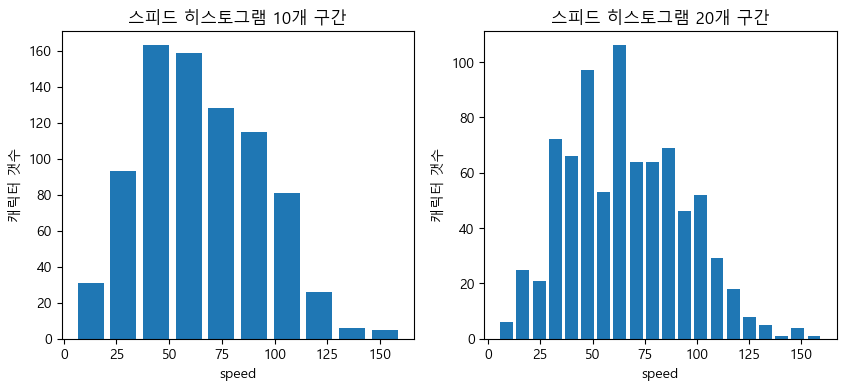

In [90]:
plt.figure( figsize= (10, 4) )

plt.subplot(1, 2, 1)   # 차트영역을, 1행 2열로 만들어서 첫번째 영역에 그려라.

plt.hist(data= df, x = 'speed', rwidth= 0.8)
plt.title('스피드 히스토그램 10개 구간')
plt.xlabel('speed')
plt.ylabel('캐릭터 갯수')

plt.subplot(1, 2, 2)   # 차트영역을, 1행 2열로 만들어서 두번째 영역에 그려라.

plt.hist(data= df, x = 'speed', rwidth= 0.8, bins= 20)
plt.title('스피드 히스토그램 20개 구간')
plt.xlabel('speed')
plt.ylabel('캐릭터 갯수')

plt.savefig('chat2.png')
plt.show()

## Scatterplots

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [105]:
data_path = 'datas/fuel_econ.csv'
df = pd.read_csv(data_path)

In [106]:
# 상관분석
df.corr(numeric_only = True)

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
id,1.000000,0.985668,-0.060096,-0.074666,-0.006569,-0.021951,0.091800,0.091225,0.090593,0.095359,0.093803,-0.099717,-0.127873,-0.122321
year,0.985668,1.000000,-0.055313,-0.070424,0.006232,-0.033643,0.068050,0.066742,0.073290,0.077641,0.071993,-0.081165,-0.149829,-0.145141
cylinders,-0.060096,-0.055313,1.000000,0.933872,0.247571,-0.004264,-0.693103,-0.666029,-0.766275,-0.771503,-0.738023,0.848274,-0.783858,-0.781815
displ,-0.074666,-0.070424,0.933872,1.000000,0.259336,0.022072,-0.713479,-0.686166,-0.783984,-0.788457,-0.758397,0.855375,-0.793432,-0.791216
pv2,-0.006569,0.006232,0.247571,0.259336,1.000000,-0.665642,-0.278109,-0.272546,-0.296808,-0.298504,-0.290883,0.287200,-0.296088,-0.293156
pv4,-0.021951,-0.033643,-0.004264,0.022072,-0.665642,1.000000,0.035188,0.037869,0.074952,0.077442,0.047333,-0.050153,0.064876,0.065263
city,0.091800,0.068050,-0.693103,-0.713479,-0.278109,0.035188,1.000000,0.996377,0.915435,0.909658,0.989552,-0.904305,0.905681,0.898793
UCity,0.091225,0.066742,-0.666029,-0.686166,-0.272546,0.037869,0.996377,1.000000,0.899557,0.897814,0.981106,-0.885823,0.891297,0.884458
highway,0.090593,0.073290,-0.766275,-0.783984,-0.296808,0.074952,0.915435,0.899557,1.000000,0.992191,0.962757,-0.916456,0.914116,0.897585
UHighway,0.095359,0.077641,-0.771503,-0.788457,-0.298504,0.077442,0.909658,0.897814,0.992191,1.000000,0.956580,-0.912117,0.911355,0.894314


In [107]:
# 배기량과 연비의 관계 => 강한 반비례 관계 
df[  ['displ' , 'comb'] ].corr()

,displ,comb
displ,1.000000,-0.758397
comb,-0.758397,1.000000


In [108]:
df

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


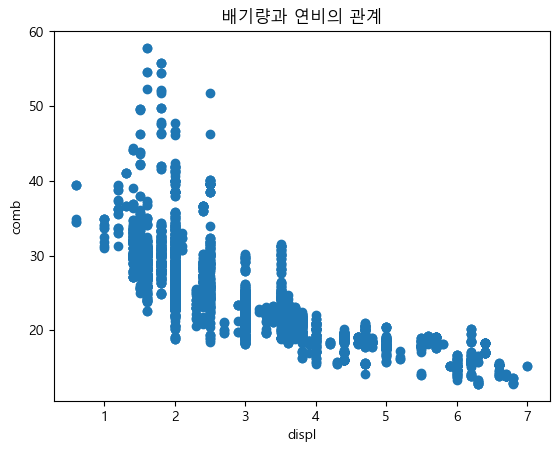

In [109]:
plt.scatter(data= df, x= 'displ', y= 'comb' )
plt.title('배기량과 연비의 관계')
plt.xlabel('displ')
plt.ylabel('comb')
plt.show()

In [110]:
df

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


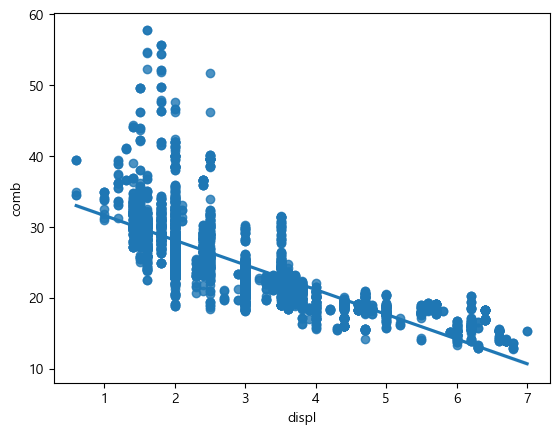

In [111]:
sb.regplot(data = df, x='displ', y='comb')
plt.show()

In [112]:
df[['displ','comb']].corr()

,displ,comb
displ,1.000000,-0.758397
comb,-0.758397,1.000000


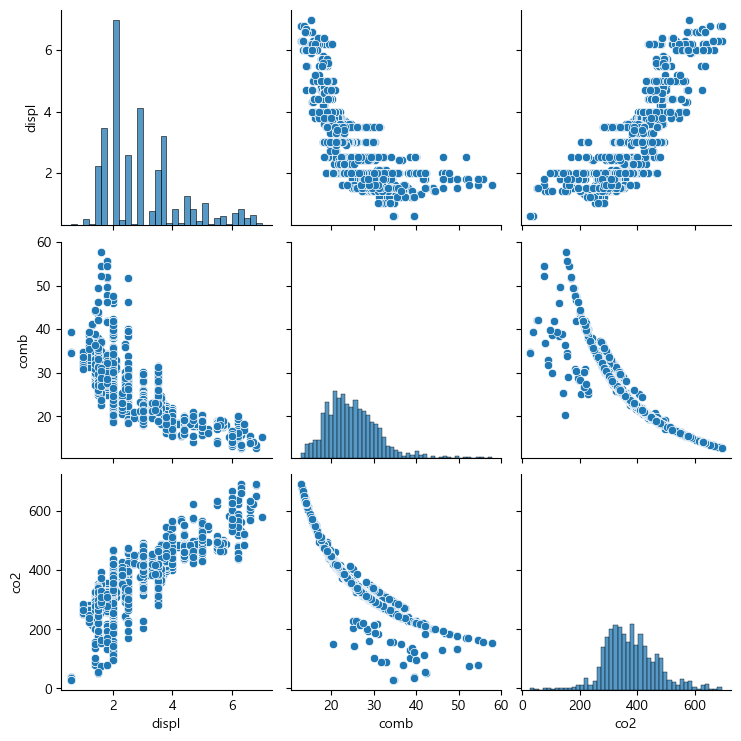

In [113]:
sb.pairplot(data= df,  vars= ['displ', 'comb', 'co2' ] )
plt.show()

## Heat Maps
- 밀도를 나타내기 좋다

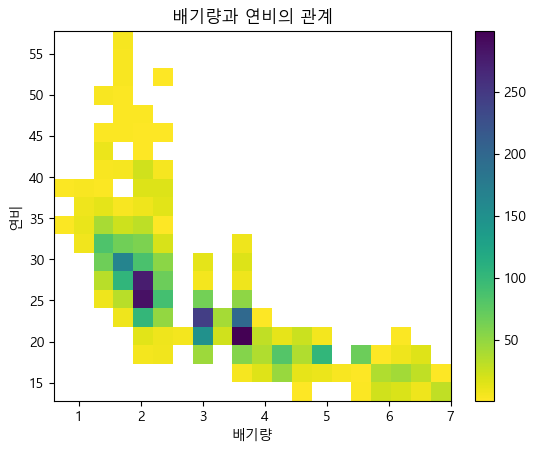

In [117]:
plt.hist2d(data= df, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=20)
plt.colorbar()
plt.title('배기량과 연비의 관계')
plt.xlabel('배기량')
plt.ylabel('연비')
plt.show()

In [120]:
flights_df = sb.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [124]:
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [126]:
pivot_df = flights_df.pivot(columns= 'year', index = 'month', values = 'passengers')
pivot_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

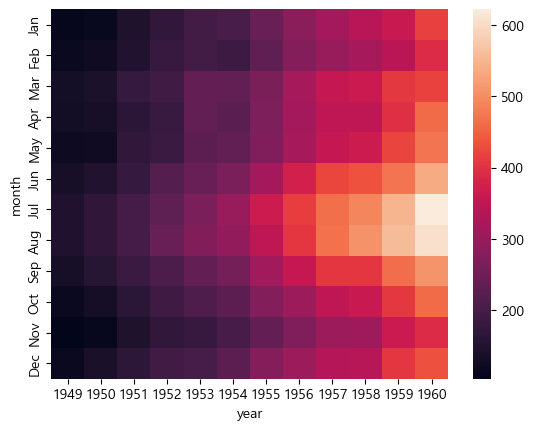

In [128]:
sb.heatmap(pivot_df)

## 문제 1. 위에서 city 와 highway 에서의 연비 관계를 분석하세요.

In [129]:
df.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

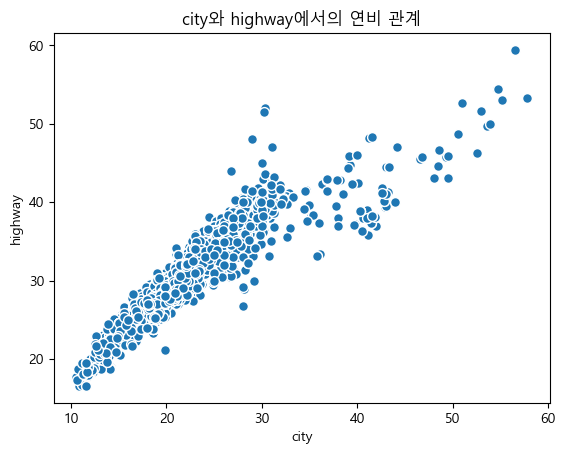

In [150]:
plt.scatter(data= df, x= 'city', y= 'highway', edgecolor='white', s =50)
plt.title('city와 highway에서의 연비 관계')
plt.xlabel('city')
plt.ylabel('highway')
plt.show()

## 문제 2. 엔진 크기와 이산화탄소 배출량의 관계를 분석하세요.

In [135]:
df.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

In [140]:
import seaborn as sns

In [141]:
corr = df[['displ','co2']].corr()

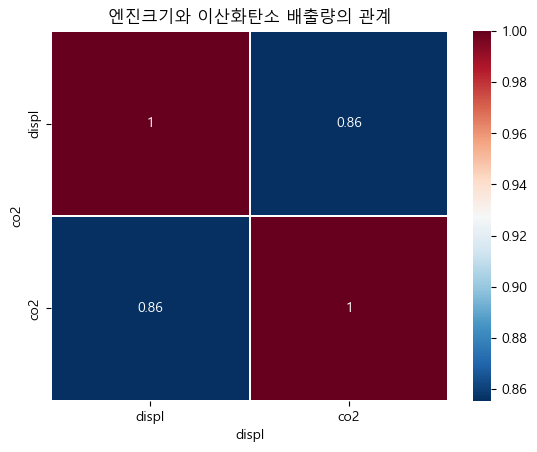

In [154]:
sns.heatmap(corr,cbar= True,linewidths=0.01,annot = True, cmap= 'RdBu_r')
plt.title('엔진크기와 이산화탄소 배출량의 관계')
plt.xlabel('displ')
plt.ylabel('co2')
plt.show()

## 문제3 displ 배출량의 이상치 확인
 - seabor의 박스플랏
 - 'displ' 컬럼의 데이터에 이상치가 있는지 확인하기

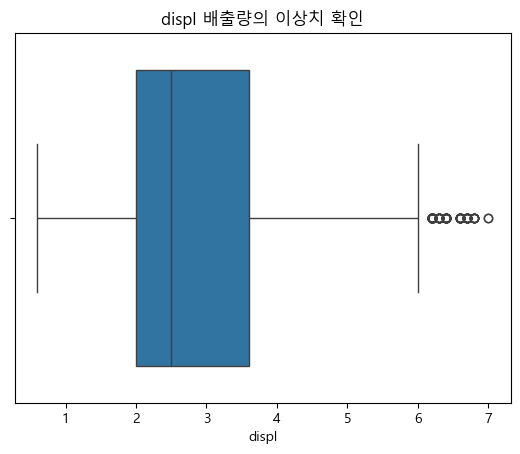

In [146]:
sns.boxplot(data=df, x= 'displ')
plt.title('displ 배출량의 이상치 확인')
plt.xlabel('displ')
plt.show()